
# Project: Investigate a Dataset - TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The TMDb dataset provides information about 10,000 movies taken from The Movie Database. This dataset contains 21 columns to give insight about the movies. The first and second columns are numerical identifiers such as the movie's id, and IMDb id. The database goes on to present the movie's most important continuous attributes including its popularity, its budget , and its revenue. The next 11 columns include its most defining features such as its title, cast, homepage, director, tagline, keywords, overview, runtime, genres, production company, and release date. Excluding the homepage website, these columns give a deeper insight into the nature of the movie and it's description. Additional columns include the vote count and average which communicate the amount of people who voted on the movie and what the mean of those votes were. The release year alone is also given its own column. Finally, the last two columns give an inflation adjusted budget and revenue, thus making the movies more easily comparable.


### Question(s) for Analysis

Question 1: What Genre requires the highest budget?  
Question 2: What was each year's most popular movie? Was it's budget within the average movie budget of that year?    
Question 3: Which production company has the most movies? Which has the most popular movies?  
Question 4: Which year has the most profit from movies?  
Question 5: How many movies have negative profit?


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
% matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


In [3]:
# Upgrade matplotlib to avoid bugs
!pip install --upgrade matplotlib

Requirement already up-to-date: matplotlib in /opt/conda/lib/python3.6/site-packages (3.3.4)


<a id='wrangling'></a>
## Data Wrangling


### General Properties


In [4]:
# Load data and print out a few lines. 
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
# Check number of rows and columns
df.shape

(10866, 21)

In [6]:
# Check for data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [7]:
# Check for the column names to determine the ones necessary for the research questions
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')


### Data Cleaning

 

> In the next cells, the data will be cleaned from uneccessary columns, null values, duplicates, etc.

In [8]:
# Dropping the unnecessary columns
df=df.drop(['id','imdb_id','homepage','director','tagline','keywords','overview','release_date','vote_count',\
              'revenue_adj','budget_adj'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
vote_average            10866 non-null float64
release_year            10866 non-null int64
dtypes: float64(2), int64(4), object(4)
memory usage: 849.0+ KB


> After dropping the unnecessary columns, 'info' returned the data types as well as number of null variables.  
The data types are good but there seems to be null values in the columns: 'cast','genres', and 'production_companies'.

In [9]:
#Checking for duplicated rows
df.duplicated().sum()

1

In [10]:
# Removing duplicate rows, and checking the removal by checking the new number of rows
df.drop_duplicates(keep = 'first', inplace = True)
df.shape

(10865, 10)

> The data was also checked for duplicates, which returned that one duplicate exists. The duplicate was dropped, with the first instance being kept.

In [11]:
# Checking for null
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
runtime                    0
genres                    23
production_companies    1030
vote_average               0
release_year               0
dtype: int64

In [12]:
# Keeping all rows except those where 'production_companies' are null
df = df[df['production_companies'].notna()]
# Replacing the rest of null values with 'unknown'
df.fillna('unknown', inplace=True)
# Ensuring there is no more null values
df.isnull().sum()

# Removing rows where 'budget' or 'revenue' are set to 0 
df = df[df['budget'] != 0]
df = df[df['revenue'] != 0]

#checking new shape
df.shape

(3808, 10)

>The null values seem to be the most in 'production_companies', making up ~10% of the dataset. Since this column will be necessary for our research question, the 1030 rows were removed. The rest of the null values were simply replaced by 'unknown'.  
Lastly, a big chunk of the budget and revenue columns had a value set to 0 so these were removed also removed leaving 3808 rows of data. 

In [13]:
# Creating new column 'profit' by subtracting budget from revenue
df['profit']=df['revenue']-df['budget']
df.head()

,popularity,budget,revenue,original_title,cast,runtime,genres,production_companies,vote_average,release_year,profit
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,228436354
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015,1868178225
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,7.3,2015,1316249360


> A column called profit was added for further insight. This was done by subtracting the budget values from the revenue values. 

<a id='eda'></a>
## Exploratory Data Analysis



> **An exploratory analysis will be conducted to answer the research questions and better understand the database.** 

> Firstly, it might be beneficial to look at some general descriptive statistics of the relevant variables.

In [14]:
# Checking the data's statistics
df.describe()

,popularity,budget,revenue,runtime,vote_average,release_year,profit
count,3808.000000,3.808000e+03,3.808000e+03,3808.000000,3808.000000,3808.000000,3.808000e+03
mean,1.202943,3.758026e+07,1.088904e+08,109.362395,6.170142,2001.232668,7.131018e+07
std,1.480290,4.231668e+07,1.772524e+08,19.855757,0.792342,11.326075,1.513296e+08
min,0.010335,1.000000e+00,2.000000e+00,15.000000,2.200000,1960.000000,-4.139124e+08
25%,0.470235,1.000000e+07,1.423422e+07,96.000000,5.700000,1995.000000,-1.174521e+06
50%,0.808991,2.500000e+07,4.616189e+07,106.000000,6.200000,2004.000000,2.047165e+07
75%,1.386848,5.000000e+07,1.260484e+08,119.000000,6.700000,2010.000000,8.345526e+07
max,32.985763,4.250000e+08,2.781506e+09,338.000000,8.400000,2015.000000,2.544506e+09


> Some interesting numbers here are the the means of popularity, profit, and budget.  
-The mean popularity of movies being ~1.2 despite its max being ~33.  
-The mean budget is 37,580,260 
-The mean profit is 71,310,180  
-The minimum profit is in the negatives meaning that the data set includes movies that spent more money than earned.

> Next, a scatterplot matrix will help us see if there is any correlations we should specifically examine.  
First, 'warnings' will be imported to suppress any matplotlib warnings that might appear in the process 

In [15]:
# importing warnings library and setting warning to be ignored
import warnings
warnings.filterwarnings("ignore")

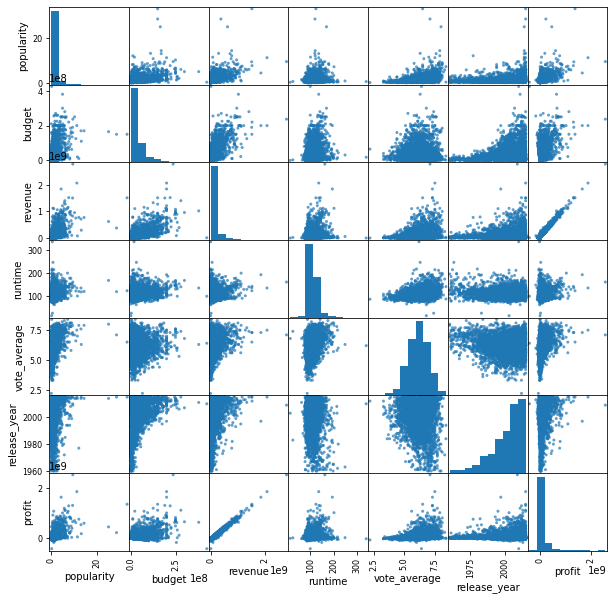

In [16]:
# Creating a matrix with all scatterplots from the data
pd.plotting.scatter_matrix(df,alpha = 0.7, figsize= (10,10), grid=True );

> What can be seen from the matrix is that most of the variables don't appear to have a clear correlation with one another, except for that between revenue and profit that have a positive relationship.

### Research Question 1: What movie genre requires the highest budget?

> This research question will need the columns 'genres' and 'budget' to come to get the necessary conclusions.

> Since some movies have more than one genre in the column 'genres' that are seperated with a '|' , this makes it necessay to alter the dataset firs. We, therefore need to split the movies with more than one genre into multiple rows (with a different genre for each), by using the explode function. 

In [17]:
# Exploding movies with multiple genres into multiple rows.
df2=df

df2=df2.assign(genres=df2.genres.str.split('|')).explode('genres')
df2.head()

,popularity,budget,revenue,original_title,cast,runtime,genres,production_companies,vote_average,release_year,profit
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,1363528810
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,1363528810
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,1363528810
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,228436354


> Firstly lets look at the budget of the dataset

In [18]:
#get the mean budget from the whole dataset
df2['budget'].mean().astype(int)

42034794

> A bar chart will demonstrate the average budget per genre. To do this, 'groupby' will be used to get the mean of the budget per genre. Matplotlib will be used to create and customize the bar chart

In [19]:
# Getting the mean of the budgets for each genre
genres_budget=df2.groupby(['genres'],as_index=False)['budget'].mean().sort_values(by=['budget'])
genres_budget

,genres,budget
16,TV Movie,5.000000e+06
5,Documentary,5.621577e+06
9,Foreign,1.060568e+07
11,Horror,1.866482e+07
12,Music,2.642924e+07
14,Romance,2.756974e+07
6,Drama,2.836941e+07
4,Crime,3.313061e+07
3,Comedy,3.355646e+07
13,Mystery,3.513943e+07


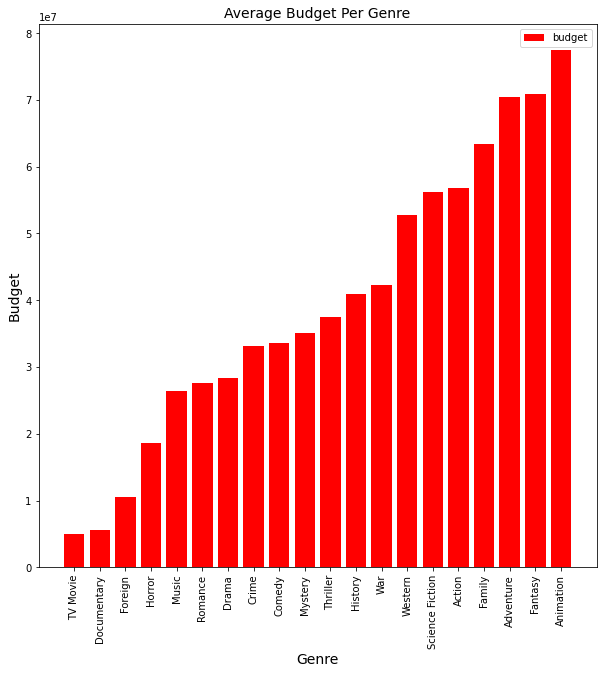

In [21]:
# Creating bar chart to communicate results
# Variables for the x and y axis
x1=genres_budget['genres']
y1=genres_budget['budget']

#Specifying features such as color, labels, ticks, and figure size
plt.bar(x1,y1,color="red",label='budget')
plt.legend()
plt.ylabel('Budget',fontsize=14)
plt.xlabel('Genre',fontsize=14)
plt.xticks(rotation = 90)
plt.title('Average Budget Per Genre',fontsize=14)
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

> It seems that animated movies require the most amount of financial investment, followed by fantasy and adventure. While TV movie, documentary, foreign, and horror are the genres with the least required budget.

   ### Research Question 2: What was each year's most popular movie? Was it's budget within the average movie budget of that year?

> This research question will make us identify what is the most popular movie each year, what the average budget per year is, and how the year's most popular movie's budget compares to the average movie budget that year

> First, lets see the amount of movies per year

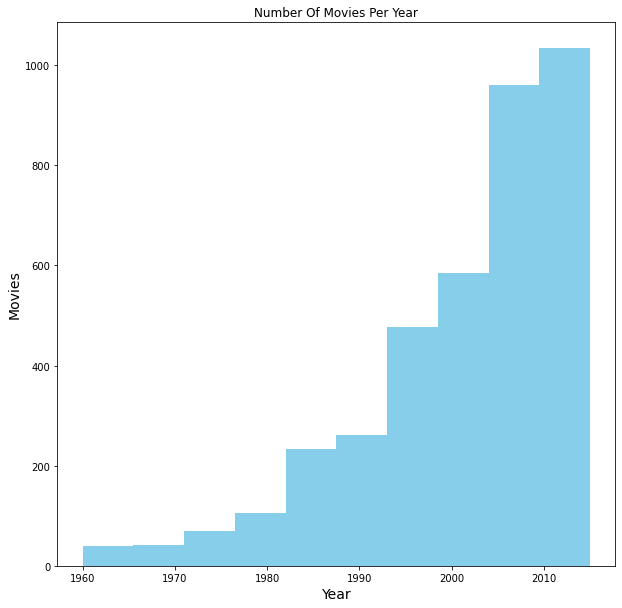

In [22]:
# create histogram with release year on x axis and number of movies on y axis
x= df['release_year']
plt.hist(x,color='skyblue')
plt.ylabel('Movies', fontsize=14)
plt.xlabel('Year',fontsize=14)
plt.title('Number of movies per year'.title())
plt.show()

In [23]:
# A list to store all the years in the dataset for the forloop's clarity
# A list to store all the budgets for the most popular movie
# A dictionary to store the most popular movie of each year

years=[]
movie_budget_list=[]
pop_movie_year={}

# for loop to get the most popular movie of each year and store it in dictionary
for year in sorted(df['release_year']):
    if year not in years:
        df3=df[df['release_year']==year]
        movie=df3[df3['popularity']== df3['popularity'].max()]['original_title'].to_string(index=False).strip() 
        movie_budget=df3[df3['popularity']== df3['popularity'].max()]['budget'].to_string(index=False).strip()
        years.append(year) #appending year to years list so it doesn't go through for loop again
        movie_budget_list.append(int(movie_budget)) #setting movie budget dtype to integer and adding it to budget list
        pop_movie_year[year]=movie #adding year and movie to dictionary 
        

# creating dataframe from dictionary and adding a column that includes the budget of the movie
pmdf=pd.Series(pop_movie_year).to_frame().reset_index()
pmdf['best_movie_budget'] = movie_budget_list
pmdf.rename(columns = {'index' : 'release_year', 0 : 'movie_name'}, inplace = True)

> A for loop was made to get the most popular movie of each year and it's budget. A dictionary was created with the year and movie. A dataset was created out of the dictionary where the budget was added. 

In [24]:
# creating a dataframe that includes the release year and average budget of that year 
year_budget=df.groupby(['release_year'],as_index=False)['budget'].mean().sort_values(by=['release_year'])
year_budget.rename(columns = {'budget' : 'average_budget'}, inplace = True)

> A dataframe with the average budget per year was created 

In [25]:
# merging dataframes to get a dataframe that includes the year, average movie budget, most popular movie, and it's budget
year_df=pd.merge(year_budget,pmdf, on='release_year')
year_df['average_budget']=year_df['average_budget']
year_df['average_budget']=year_df['average_budget'].astype(int)
year_df

,release_year,average_budget,movie_name,best_movie_budget
0,1960,4161389,Psycho,806948
1,1961,3863700,One Hundred and One Dalmatians,4000000
2,1962,5635714,Dr. No,1100000
3,1963,10185833,From Russia With Love,2500000
4,1964,4847880,Goldfinger,3500000
5,1965,11760000,Thunderball,11000000
6,1966,6453600,Who's Afraid of Virginia Woolf?,7500000
7,1967,7346153,The Jungle Book,4000000
8,1968,5994444,2001: A Space Odyssey,12000000
9,1969,5711021,On Her Majesty's Secret Service,7000000


> Both dataframes were merged to one that shows the year, averaged budget per year, the most popular movie, and its budget.
For example, in 1960, the average budget was 4,161,389 while the most popular movie's budget was 806,948 for the movie Psycho.
In 2015, the average budget was 44,817,359, while the most popular movie's budget was 150,000,000 for Jurassic World

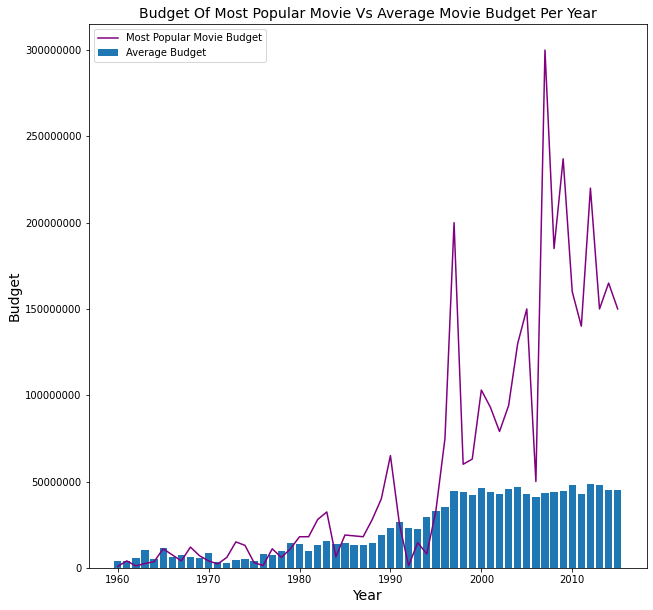

In [27]:
# Creating variables for plot
x=year_df['release_year']
y=year_df['average_budget'] #y axis for bar chart
y2=year_df['best_movie_budget'] #y axis for line char 

# Setting features for plot
plt.bar(x,y,label='Average Budget')
plt.plot(x,y2, color='purple',label='Most Popular Movie Budget')
plt.legend()
plt.ylabel('Budget', fontsize=14)
plt.xlabel('Year',fontsize=14)
plt.title('Budget of most popular movie vs average movie budget per year'.title(),fontsize=14)
plt.ticklabel_format(style='plain') # to prevent scientific notation.
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

> The visualization plots the the average budget per year with bars while the most popular movie's budget with a line. It seems that the gap between the most popular movie's budget and the average budget per year has been generally increasing dramatically over time.

### Research Question 3: Which production company has the most movies? Which has the most popular movies?

> This research question aims to find out which production companies produces the most movies and which of them has the most popular movies.

> Explode was used to make different rows for movies with more than one production companies. A new dataset was then created with only the top 10 production companies with the most amount of movies

In [28]:
# Explode was used to split movies with multiple production companies into multiple rows
df3=df.assign(production_companies=df.production_companies.str.split('|')).explode('production_companies')
df4=df3.production_companies.value_counts().head(10) #The most popular 10 companies and their number of movies

# for loop was created to make list with the top 10 production companies
prod_companies=[]
for i in range(10):
    prod_companies.append(df4.index[i])
    
# Dataset was created with only movies produced by the top 10 companies
df5=df3[df3['production_companies'].isin(prod_companies)]
df5.head() # preciew of dataset 

,popularity,budget,revenue,original_title,cast,runtime,genres,production_companies,vote_average,release_year,profit
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,Universal Pictures,7.3,2015,1316249360
6,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures,5.8,2015,285603537
7,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation,7.6,2015,487380321
8,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,91,Family|Animation|Adventure|Comedy,Universal Pictures,6.5,2015,1082730962
9,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,94,Comedy|Animation|Family,Walt Disney Pictures,8.0,2015,678708609


In [29]:
# return the movie counts of the top 10 production companies with the most movie counts
df4

Universal Pictures                        329
Warner Bros.                              324
Paramount Pictures                        270
Twentieth Century Fox Film Corporation    201
Columbia Pictures                         178
New Line Cinema                           152
Walt Disney Pictures                      117
Touchstone Pictures                       116
Metro-Goldwyn-Mayer (MGM)                 109
Relativity Media                          102
Name: production_companies, dtype: int64

> Universal Pictures seems to have the most movies, followed by Warner bros and Paramount Pictures.

In [30]:
# The top 10 production companies and their mean popularity
prod_company=df5.groupby(['production_companies'],as_index=False)['popularity'].mean().sort_values(by=['popularity'])
prod_company

,production_companies,popularity
5,Touchstone Pictures,0.909201
1,Metro-Goldwyn-Mayer (MGM),1.201606
7,Universal Pictures,1.261508
3,Paramount Pictures,1.325754
4,Relativity Media,1.329656
0,Columbia Pictures,1.379221
2,New Line Cinema,1.395487
6,Twentieth Century Fox Film Corporation,1.556773
9,Warner Bros.,1.593469
8,Walt Disney Pictures,2.023658


> Despite Universal pictures making the most movies, Walt Disney Pictures seems to have the most popular movies.

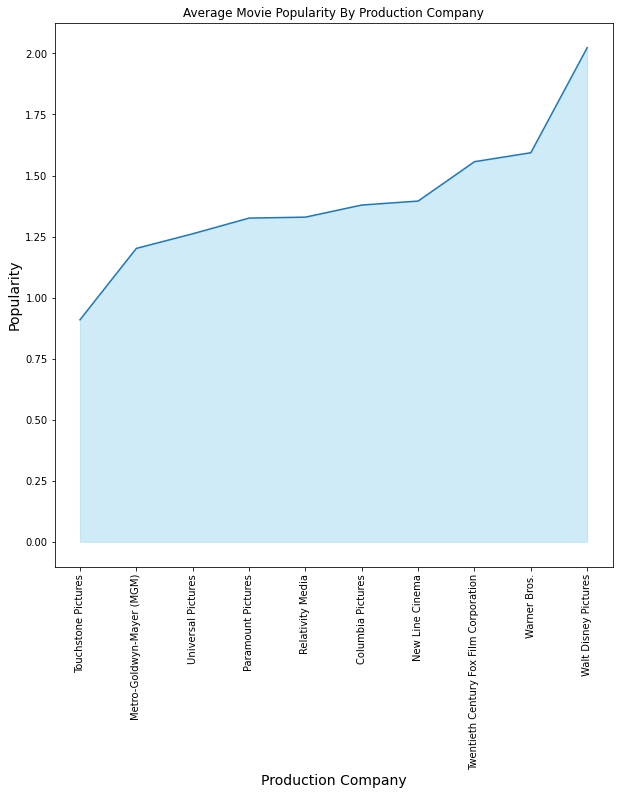

In [31]:
# Setting x and y variables 
x=prod_company['production_companies']
y=prod_company['popularity']

# creating mean popularity per production company plot and defining features
plt.plot(x,y)
plt.fill_between(np.arange(10),y,color='skyblue',alpha=0.4)
plt.xticks(rotation='vertical')
plt.ylabel('Popularity', fontsize=14)
plt.xlabel('Production Company',fontsize=14)
plt.title('Average Movie Popularity By Production Company')
plt.rcParams["figure.figsize"] = (8,8)
plt.show()

> This plot shows the most popular production company as well as its popularity score. Showing that Toucstone Pictures has the lowest popularity, followed by MGM and then Universal Pictures. The most popular are Walt Disney Pictures followed by Warner Bros, and Twentieth Century Fox Film Corporation.

###  Research Question 4: Which year has the most profit from movies? 

> To find out which year was the most profitable for movies, the sum of profits per year will be looked at as well as the mean of the profits.

> Two functions will be created, to make this possible. The function Top10Grouped will allow us see the top 10 profits and their year by specifying their variables and the statistic desired (sum or mean in this case). ProfitPlot function has the same three arguments and a color argument as it will creat a plot for us to visualize the relationship between profit and year based on the specified statistic

In [32]:
def Top10Grouped(df,x,y,stat=' '):
    '''
    Groups x by a defined statistic of y and returns the top 10
    '''
    groupby = df.groupby([x],as_index=False)[y].agg(stat) #groupby statement
    groupby=groupby.sort_values(y,ascending=False).head(10) #checking top 10
    return groupby

In [33]:
def ProfitPlot(df,x,y,stat=' ',color=' '):
    '''
    Creates line plot with the inputted variable based on a chosen statistic
    inputs:
        df: dataframe
        x: x-axis
        y: y-axis
        stat: statistic
        color: line color
    ouput:
        designated line plot
    '''
    
    #creates statement to group the x axis by a statistic of the y axis
    groupby = df.groupby([x])[y].agg(stat)
    plt.plot(groupby, color=color) #create plot and choose line color
    x=x.replace('_',' ') #replacing underscores with spaces to use to the variable names for the title
    y=y.replace('_',' ')
    
    #creating labels and title and dictating figure size
    plt.ylabel(y.title()) 
    plt.xlabel(x.title())
    plt.title(f'{stat} of {y} by {x}'.title())
    plt.rcParams["figure.figsize"] = (8,8)


> The total profits per year will be calculated using the function Top10Grouped to find most profitable year in total.

In [34]:
#Getting sum of profits per year
Top10Grouped(df,'release_year','profit',stat='sum')

,release_year,profit
55,2015,19032145273
54,2014,16676201357
52,2012,16565945507
53,2013,15786553713
51,2011,14971939503
49,2009,14076747183
50,2010,13345003371
48,2008,11768955058
47,2007,11699867976
44,2004,9825366827


> 2015 has the most total profits followed by 2014, however 2012 has more than 2013

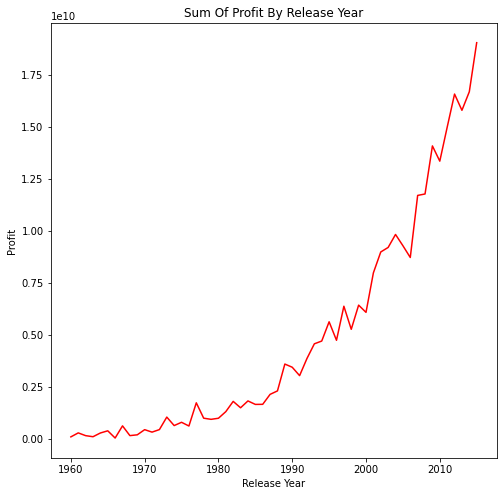

In [35]:
#Use function to create plot of total profit by release year
ProfitPlot(df, 'release_year','profit',stat='sum',color='red')

> The total profits per year will be calculated using the function Top10Grouped to find most profitable year by mean.

In [36]:
#Getting mean of profits per year
Top10Grouped(df,'release_year','profit',stat='mean')

,release_year,profit
55,2015,1.189509e+08
52,2012,1.055156e+08
54,2014,1.010679e+08
17,1977,9.175308e+07
15,1975,8.980081e+07
53,2013,8.819304e+07
13,1973,8.814051e+07
49,2009,8.280440e+07
5,1965,7.985637e+07
34,1994,7.719727e+07


> 2015 also has the highest mean profit however it is followed by 2012, 2014, and then 1977 and 1975. Signalling higher variation than when the total profit is calculated.

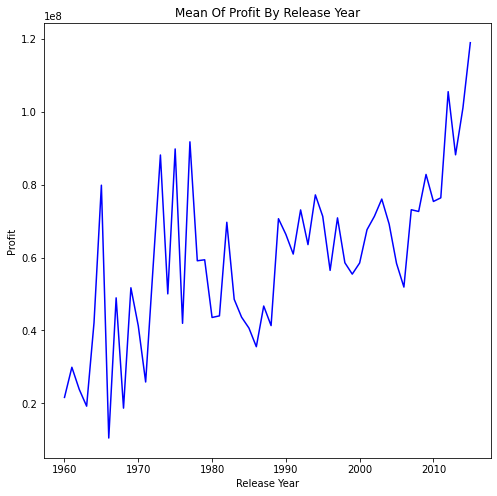

In [37]:
#Use function to create plot of mean profit by release year
ProfitPlot(df, 'release_year','profit',stat='mean',color='blue')

> The plot shows that while there is a general increase in mean profits per year, the mean profit in the dataset seems to have higher points between the 1960s and 1980s than betweeen the 1980s and early 2000s. 

### Research Question 5: How many movies have a negative profit?

> A new dataframe with only movies with a profit less than 0 will be created and the number of rows it has will be calculated

In [38]:
#choosing movies with a negative profit
negative_profit = df[df['profit'] < 0]

negative_profit.index = range(len(negative_profit)) #reindexing data
negative_profit.index = negative_profit.index + 1 #starting index from 1

#counting number of rows of the new dataset 
len(negative_profit)

1047

> 1047 movies out of the 3808 in the dataset yielded a negative profit. That is ~ 27.5% of the dataset.

<a id='conclusions'></a>
## Conclusions

 
>**The conclusions** of the questions are:  
-
The most costly genre of movies are animation, fantasy, and adventure. The least costly are 'Tv Movie', Documentary, Foreign, and horror. This is based on the average movie budgets of each genre. Additional research can be done to figure out the allocation of costs for these different genres.  
-
Both the average budget per year and the budget of the most popular movie per year are increasing through time. However, there is a greatly wider gap between the both through time. Through the 60s to the 90s, the most popular movie per year generally had a budget that was within the average. But toward the early 2000s, the most popular movie generally started having a budget that is more and more beyond the average. Additional research can be done on whether this is due to the higher standards put on movies to become popular with the increase in movie production.
-
The production company that produces the most film, doesn't necessarily produce the most popular films. While Universal Pictures produced 212 more movies than Walt Disney Pictures in this dataset, Walt Disney Pictures has a higher movie popularity average. Additional research can explore what kind of movies put Walt Disney Pictures in this lead.  
-
2015 has the highest total profits, and highest average profit. However, while the yearly total profit of movies is steadily increasing, the yearly average profit per movie, varies more from year to year.  
-
The dataset shows that a good number of movies made are actually not profitable at all  with 27.5% of the cleaned dataset having a negative profit. Future research can examine the commonalities between movies with negative profits.
 

> **The limitiations** of this exploration are:  
A lot of the movies in the dataset had incomplete information, leading to a limited number of movies being valid for exploaration on the basis of especially budget, revenue, and production_company.  
The conclusions are only applicable for a limited number of movies therefore it cannot be completely representative of all existing movies.  
The data has not been updated since 2015, considering that is 7 years ago now a lot of changes might have happened in the movie industry.


## Submitting your Project 


In [39]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0